# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined_data.head())


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [142]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()

print(num_mice)



249


In [143]:
# Find duplicate mice by ID number and timepoint
duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()





In [144]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = combined_data.loc[combined_data["Mouse ID"] == duplicate_mice[0], :]


# Print the duplicate data

print(duplicate_data)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [145]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Find the duplicate mice by ID number and timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]

# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

# Print the number of rows in the clean DataFrame
print(len(clean_data))


1888


In [146]:
# Checking the number of mice in the clean DataFrame.

num_mice_clean = clean_data["Mouse ID"].nunique()
print(num_mice_clean)


249


## Summary Statistics

In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the data by drug regimen and calculate summary statistics
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for clarity
summary_stats = summary_stats.rename(columns={
                                             "mean": "Mean Tumor Volume (mm3)",
                                             "median": "Median Tumor Volume (mm3)",
                                             "var": "Tumor Volume Variance",
                                              "std": "Tumor Volume Std. Dev.",
                                             "sem": "Tumor Volume Std. Err."
})

# Print the summary statistics table
print(summary_stats)



              Mean Tumor Volume (mm3)  Median Tumor Volume (mm3)  \
Drug Regimen                                                       
Capomulin                   40.675741                  41.557809   
Ceftamin                    52.591172                  51.776157   
Infubinol                   52.884795                  51.820584   
Ketapril                    55.235638                  53.698743   
Naftisol                    54.331565                  52.509285   
Placebo                     54.033581                  52.288934   
Propriva                    52.393463                  50.909965   
Ramicane                    40.216745                  40.673236   
Stelasyn                    54.233149                  52.431737   
Zoniferol                   53.236507                  51.818479   

              Tumor Volume Variance  Tumor Volume Std. Dev.  \
Drug Regimen                                                  
Capomulin                 24.947764                4.9947

In [148]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={"mean": "Mean Tumor Volume (mm3)", "median": "Median Tumor Volume (mm3)", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err."})
summary_stats

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

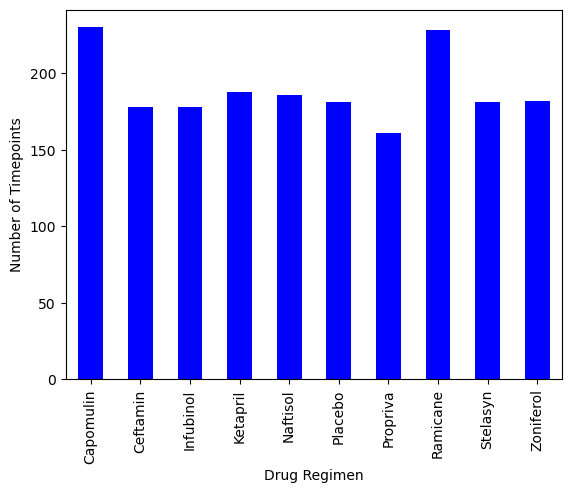

In [149]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_counts = combined_data.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot using Pandas
timepoint_counts.plot(kind='bar', color='blue')

# Set the title and axis labels

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

# Display the plot
plt.show()




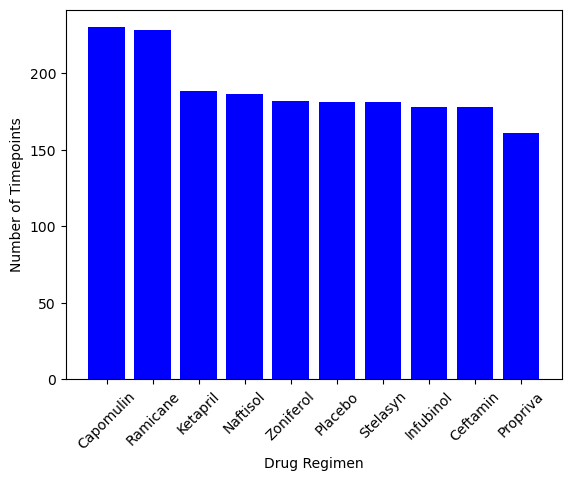

In [150]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.




timepoints_count = combined_data["Drug Regimen"].value_counts()

# Create a bar plot using pyplot
plt.bar(timepoints_count.index, timepoints_count.values, color='blue')

# Set the title and axis labels

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()






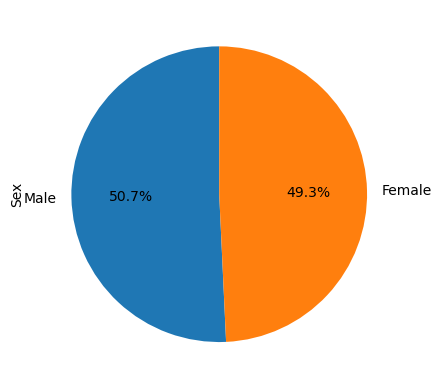

In [151]:
# Count the number of male and female mice
sex_counts = clean_data["Sex"].value_counts()

# Create the pie plot
sex_counts.plot.pie(autopct="%1.1f%%", startangle=90, )

# Show the chart
plt.show()




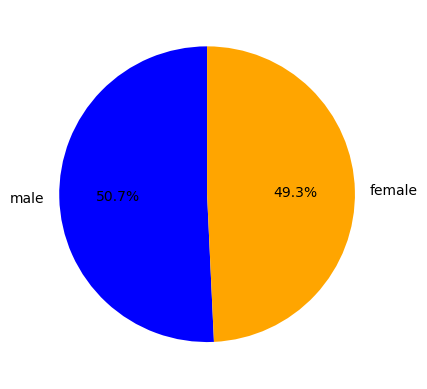

In [152]:
# Count the number of male and female mice
sex_counts = clean_data["Sex"].value_counts()

# Create the pie plot
labels = ["male", "female"]
colors = ["blue", "orange"]
plt.pie(sex_counts, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)


# Show the chart
plt.show()



## Quartiles, Outliers and Boxplots

In [153]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data to only include the four treatment regimens
filtered_data = clean_data[clean_data['Drug Regimen'].isin(treatments)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge the last_timepoints series with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'])

# Create a new DataFrame with only the columns we need
final_tumor_volumes = merged_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Display the final tumor volume data
final_tumor_volumes.head()


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543


In [154]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = combined_data.loc[combined_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    print(f"{treatment} potential outliers: {outliers}")

    

Capomulin potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


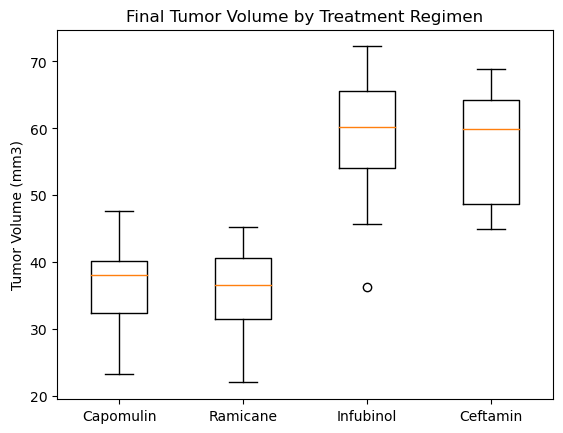

In [155]:
# Create a list of the four treatment regimens

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store the tumor volumes for each regimen
tumor_volumes = []

# Loop through the treatments list and get the final tumor volume for each mouse
for treatment in treatments:
    # Get the last timepoint for each mouse on the treatment regimen
    last_timepoint = clean_data.loc[clean_data['Drug Regimen'] == treatment].groupby('Mouse ID')['Timepoint'].max()

    # Merge the last timepoint with the clean_data to get the final tumor volume for each mouse
    tumor_volume = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')['Tumor Volume (mm3)']

    # Append the tumor volumes to the tumor_volumes list
    tumor_volumes.append(tumor_volume)

# Create a boxplot of the tumor volumes for each treatment regimen
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes, labels=treatments)

# Set the title and y-axis label
ax.set_title('Final Tumor Volume by Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()



## Line and Scatter Plots

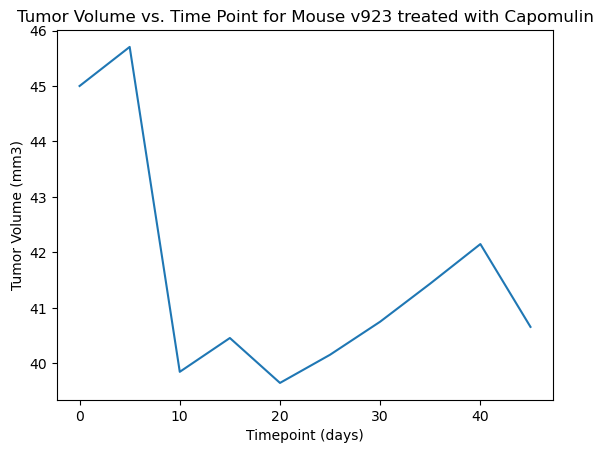

In [156]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Filter the combined_data DataFrame for the Capomulin drug regimen
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

# Select a random mouse treated with Capomulin
random_mouse = capomulin_data["Mouse ID"].sample().values[0]

# Filter the capomulin_data DataFrame for the selected mouse
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == random_mouse]

# Plot the tumor volume over time for the selected mouse
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])

# Add axis labels and a title to the plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time Point for Mouse {random_mouse} treated with Capomulin")
plt.show()


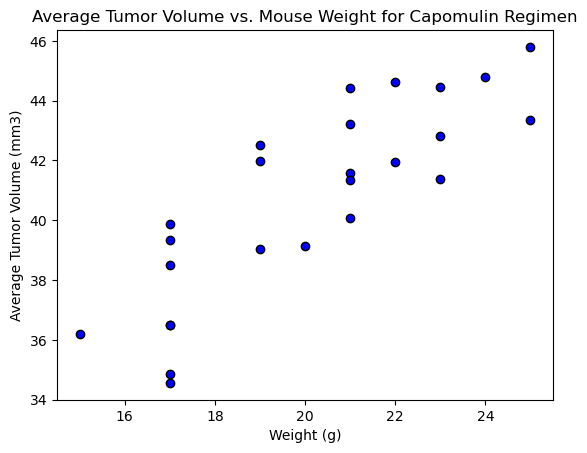

In [157]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Filter the Capomulin regimen data
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume and weight for each mouse
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Generate the scatter plot
plt.scatter(mouse_weight, avg_tumor_vol, marker="o", facecolors="blue", edgecolors="black")

# Add labels and title to the plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")

# Show the plot
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


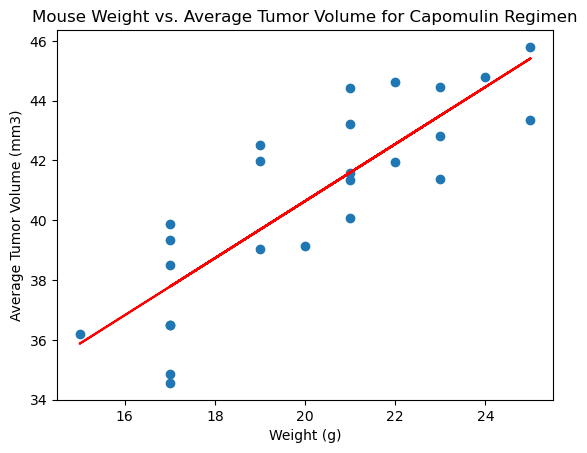

In [158]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Select data for Capomulin regimen
capomulin_data = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume and mouse weight for each mouse
avg_capomulin_data = capomulin_data.groupby(["Mouse ID"]).mean()
avg_capomulin_data = avg_capomulin_data[["Weight (g)", "Tumor Volume (mm3)"]]

# Calculate correlation coefficient
correlation = st.pearsonr(avg_capomulin_data["Weight (g)"], avg_capomulin_data["Tumor Volume (mm3)"])[0]

# Print correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}")

# Calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_capomulin_data["Weight (g)"], avg_capomulin_data["Tumor Volume (mm3)"])
regress_values = avg_capomulin_data["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot and regression line
plt.scatter(avg_capomulin_data["Weight (g)"], avg_capomulin_data["Tumor Volume (mm3)"])
plt.plot(avg_capomulin_data["Weight (g)"], regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show()



